<a href="https://colab.research.google.com/github/avnishcodes/HeartFailureRandomForest/blob/main/HeartFailureRandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
url = "https://raw.githubusercontent.com/avnishcodes/HeartFailureRandomForest/refs/heads/main/heart.csv"
df = pd.read_csv(url)
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [4]:
#Check for missing values
print("Missing values:\n", df.isnull().sum())
df = pd.get_dummies(df, drop_first=True)

#Separate features and target
X = df.drop("HeartDisease", axis=1)
y = df["HeartDisease"]

# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)


Missing values:
 Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64
Training set size: (734, 15)
Test set size: (184, 15)


In [5]:
from sklearn.ensemble import RandomForestClassifier

# Create and train the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred = rf_model.predict(X_test)


In [6]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
specificity = tn / (tn + fp)

# Print results
print("Confusion Matrix:\n", cm)
print(f"Accuracy:     {accuracy:.2f}")
print(f"Precision:    {precision:.2f}")
print(f"Recall:       {recall:.2f}")
print(f"Specificity:  {specificity:.2f}")


Confusion Matrix:
 [[66 11]
 [12 95]]
Accuracy:     0.88
Precision:    0.90
Recall:       0.89
Specificity:  0.86


In [7]:
from sklearn.model_selection import GridSearchCV
#define parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10, 20],
    'criterion': ['gini', 'entropy']
}
#create model
rf_model = RandomForestClassifier(random_state=42)
#create grid search object
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')
#fit grid search object to data
grid_search.fit(X_train, y_train)
#print best parameters
print("Best parameters: ", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Best parameters:  {'criterion': 'gini', 'max_depth': None, 'n_estimators': 150}
Accuracy:  0.875


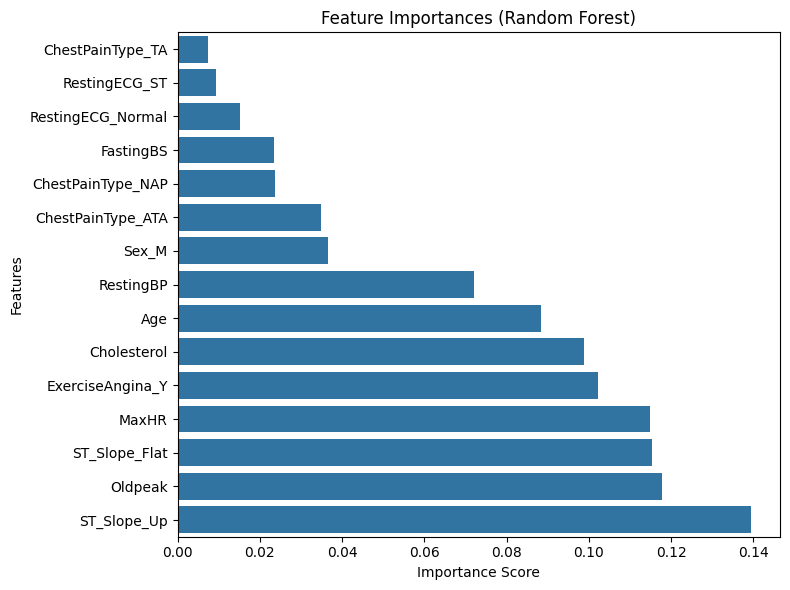

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get feature importances from best model
importances = best_model.feature_importances_
feat_imp = pd.Series(importances, index=X.columns).sort_values(ascending=True)

# Plot
plt.figure(figsize=(8,6))
sns.barplot(x=feat_imp, y=feat_imp.index)
plt.title("Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()
